# **Analysing Google Play Store Apps**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyter_black
jupyter_black.load(lab=False, line_length=160)

<IPython.core.display.Javascript object>

## **1. Take Data Insights**

In [3]:
# Read the data
google_apps_df = pd.read_csv("./Google-Playstore.csv")

### 1.1 First look at the data

In [4]:
google_apps_df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


### 1.2 Relevant insights 


**1.2.1 How many Apps are in this data set**

In [5]:
num_apps = google_apps_df.shape[0]
num_apps

2312944

**1.2.2 Are there any missing values insight the data set?**

In [6]:
nan_columns = google_apps_df.isnull().sum()
nan_columns

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

## 2. **Clean Data** 

### **2.1 Delete unnecessary columns**

In [7]:
# check if there are paid Apps which have other currency than USD and cost more than 0, this is relevant
# to see for converting the price in USD before deleting the Currency column
other_currency = google_apps_df[(google_apps_df["Currency"] != "USD") & (google_apps_df["Free"] != True) & (google_apps_df["Price"] != 0)]
other_currency

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time


In [8]:
columns_to_delete = [
    "Scraped Time",
    "Privacy Policy",
    "Released",
    "Last Updated",
    "Developer Email",
    "Size",
    "Developer Website",
    "Developer Id",
    "Minimum Android",
    "Currency",
    "Rating",
    "Rating Count",
    "Installs",
    "Minimum Installs",
    "Editors Choice",
    "Content Rating",
]
google_apps_df.drop(columns=columns_to_delete, inplace=True)
google_apps_df.head()

,App Name,App Id,Category,Maximum Installs,Free,Price,Ad Supported,In App Purchases
0,Gakondo,com.ishakwe.gakondo,Adventure,15,True,0.0,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,7662,True,0.0,True,False
2,Vibook,com.doantiepvien.crm,Productivity,58,True,0.0,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,19,True,0.0,True,False
4,GROW.me,com.horodyski.grower,Tools,478,True,0.0,False,False


### **2.2 Drop NaNs**

In [9]:
google_apps_df.dropna()

,App Name,App Id,Category,Maximum Installs,Free,Price,Ad Supported,In App Purchases
0,Gakondo,com.ishakwe.gakondo,Adventure,15,True,0.0,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,7662,True,0.0,True,False
2,Vibook,com.doantiepvien.crm,Productivity,58,True,0.0,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,19,True,0.0,True,False
4,GROW.me,com.horodyski.grower,Tools,478,True,0.0,False,False
...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,337109,True,0.0,False,False
2312940,ORU Online,com.threedream.oruonline,Education,430,True,0.0,False,False
2312941,Data Structure,datastructure.appoworld.datastucture,Education,202,True,0.0,False,False
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,2635,True,0.0,True,False


### 2.3 Change Free Column 

Check if all paid apps have price more than 0$:

In [10]:
payed_apps_0 = google_apps_df[(google_apps_df["Free"] == False) & (google_apps_df["Price"] == 0)]
payed_apps_0.shape[0]

135

Those apps should be also marked as free: 

In [11]:
free_apps = google_apps_df["Price"] == 0
google_apps_df["Free"] = free_apps

## **3. Statistic about the dataset**

### 3.1 Paid vs. free apps

#### 3.1.1 Percent paid v.s. free apps

In [12]:
types = google_apps_df["Free"].value_counts()

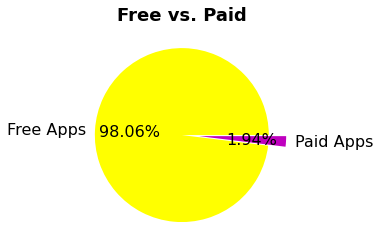

In [13]:
plt.pie(
    types,
    explode=[
        0.0,
        0.2,
    ],
    labels=["Free Apps", "Paid Apps"],
    colors=["yellow", "m"],
    autopct="%0.2f%%",
    radius=1,
    textprops={"size": 16},
)

plt.title("Free vs. Paid", fontdict={"size": 18, "weight": "bold"})
plt.plot()
plt.show()

#### 3.1.2 Percent installs free vs. paid apps

In [14]:
installs = google_apps_df[["Free", "Maximum Installs"]].groupby("Free").sum()

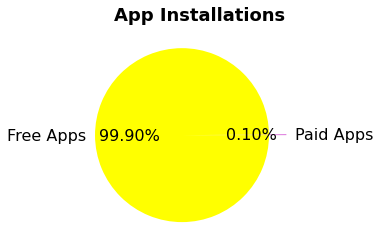

In [15]:
plt.pie(
    installs["Maximum Installs"],
    explode=[
        0.0,
        0.2,
    ],
    labels=["Paid Apps", "Free Apps"],
    colors=["m", "yellow"],
    autopct="%0.2f%%",
    radius=1,
    textprops={"size": 16},
)

plt.title("App Installations", fontdict={"size": 18, "weight": "bold"})
plt.plot()
plt.show()

#### 3.1.3 Percent of apps suporting ads or in-app purchases 

In [16]:
google_apps_df[(google_apps_df["Ad Supported"] == True) | (google_apps_df["In App Purchases"] == True)].shape[0] / google_apps_df.shape[0]

0.5207367752958999

Percent of apps suporting only ads:

In [17]:
google_apps_df[(google_apps_df["Ad Supported"] == True)].shape[0] / google_apps_df.shape[0]

0.49753647299718456

Percent of apps suporting only In App Purchases:

In [18]:
google_apps_df[(google_apps_df["In App Purchases"] == True)].shape[0] / google_apps_df.shape[0]

0.08444173313318437

### 3.2 How much are people willing to pay?

In [19]:
payed_apps = google_apps_df[(google_apps_df["Free"] == False)].copy()
payed_apps

,App Name,App Id,Category,Maximum Installs,Free,Price,Ad Supported,In App Purchases
273,Limitless Paint,com.bytescaffold.limitlesspaint,Tools,34125,False,1.99,False,False
296,Standalone Golf GPS by Hole19,com.hole19golf.wear,Sports,10407,False,4.99,False,False
417,Calculator + Widget 21 themes,makatea.pro.calculator.widget,Tools,12019,False,0.99,False,False
554,莎士比亞11連環錯（英漢對照）,tw.com.mebook.generic4719180217042,Education,2,False,2.99,False,False
618,Theme Park Simulator,com.bestridesimulators.theme.park.simulator.game,Simulation,23644,False,0.99,True,True
...,...,...,...,...,...,...,...,...
2312658,VA-Beast Essentials-2,com.planeth.vabeastessentials2,Music & Audio,2686,False,1.99,False,False
2312686,Blue Infinitum Theme - Dark,com.razerx.theme.blueinfinitum2,Personalization,1554,False,1.49,False,False
2312703,RPG Tears Revolude,kemco.wws.revolude,Role Playing,6702,False,7.99,True,True
2312803,New Cute Kitty Cats & Animals LOVE. WAStickerApps,com.wastickerapps.wasticker.sticker.emoji.new....,Entertainment,3,False,0.99,False,False


#### 3.2.1 Paid apps prices 

**Divide the paid apps into 3 price ranges**

In [20]:
bins_1 = [0, 10, 50, 400]
labels_1 = ["under 10$", "10-50$", "over 50$"]
payed_apps["Price Range 1"] = pd.cut(x=payed_apps["Price"], bins=bins_1, labels=labels_1, include_lowest=True)

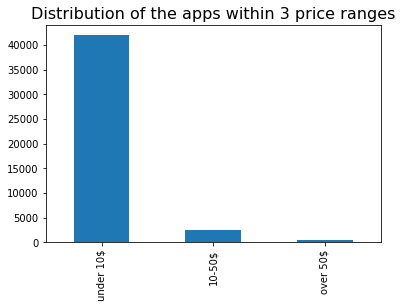

In [21]:
payed_apps["Price Range 1"].value_counts().plot(kind="bar")
plt.title("Distribution of the apps within 3 price ranges", fontdict={"size": 16})
plt.show()

**Divide the paid apps into 9 price ranges**

In [22]:
bins_2 = [0, 0.99, 2.99, 5.99, 9.99, 19.99, 49.99, 99.99, 199.99, 400]
labels_2 = ["under 1$", "1 - 2.99$", "3 - 5.99", "6 - 9.99$", "10 - 19,99$", "20 - 49.99$", "50 - 99.99$", "100 - 199.99$", "over 200$"]
payed_apps["Price Range 2"] = pd.cut(x=payed_apps["Price"], bins=bins_2, labels=labels_2, include_lowest=True)

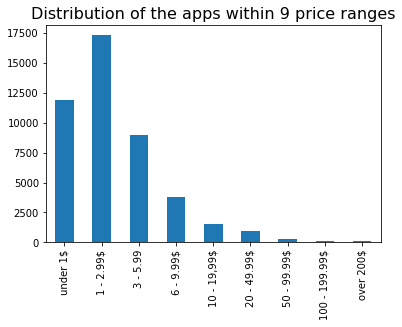

In [23]:
payed_apps["Price Range 2"].value_counts().sort_index(axis=0).plot(kind="bar")
plt.title("Distribution of the apps within 9 price ranges", fontdict={"size": 16})
plt.show()

**Proportion of Installs within the price range 1** 

In [24]:
installs_price_range_1 = payed_apps[["Price Range 1", "Maximum Installs"]].groupby("Price Range 1").sum()
installs_price_range_1

,Maximum Installs
Price Range 1,
under 10$,720916436
10-50$,21297588
over 50$,523854


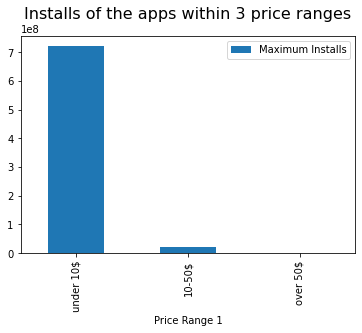

In [25]:
installs_price_range_1.plot(kind="bar")
plt.title("Installs of the apps within 3 price ranges", fontdict={"size": 16})
plt.show()

In [26]:
installs_price_range_2 = payed_apps[["Price Range 2", "Maximum Installs"]].groupby("Price Range 2").sum()
installs_price_range_2

,Maximum Installs
Price Range 2,
under 1$,211674739
1 - 2.99$,219629085
3 - 5.99,208132840
6 - 9.99$,81439857
"10 - 19,99$",18294490
20 - 49.99$,3042680
50 - 99.99$,323588
100 - 199.99$,135983
over 200$,64616


**Proportion of Installs within the price range 2**

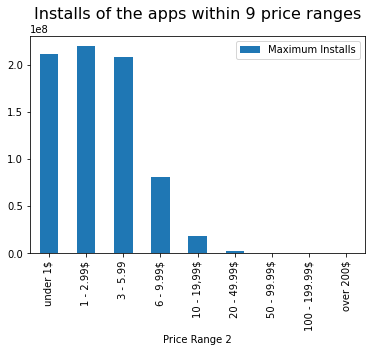

In [27]:
installs_price_range_2.plot(kind="bar")
plt.title("Installs of the apps within 9 price ranges", fontdict={"size": 16})
plt.show()

### 3.3 Average Price pro Category

**Overview of the prices and installs per category**

In [28]:
min_price_cat = payed_apps[["Category", "Price"]].groupby("Category").min()
max_price_cat = payed_apps[["Category", "Price"]].groupby("Category").max()
median_price_cat = payed_apps[["Category", "Price"]].groupby("Category").median()
avg_price_cat = payed_apps[["Category", "Price"]].groupby("Category").mean()
installs_per_cat = payed_apps[["Category", "Maximum Installs"]].groupby("Category").sum()
num_apps_cat = payed_apps[["Category", "App Id"]].groupby("Category").count()

price_statistic_frame = num_apps_cat

price_statistic_frame["Num Apps"] = num_apps_cat
price_statistic_frame["Num Installs"] = installs_per_cat
price_statistic_frame["Min Price"] = min_price_cat
price_statistic_frame["Max Price"] = max_price_cat
price_statistic_frame["Average Price"] = avg_price_cat
price_statistic_frame["Median Price"] = median_price_cat
price_statistic_frame.drop(columns=["App Id"], inplace=True)

In [29]:
price_statistic_frame.sort_values(by=["Average Price"], ascending=False)

,Num Apps,Num Installs,Min Price,Max Price,Average Price,Median Price
Category,,,,,,
Dating,24,6326,0.990000,399.99,23.073333,2.740000
Medical,1366,2751274,0.990000,365.99,16.698867,3.990000
Business,670,8015209,0.990000,399.99,12.295755,3.740000
Art & Design,172,695069,0.990000,354.99,9.543314,2.490000
Sports,1351,15174628,0.981996,338.99,7.959829,2.990000
Social,225,1621272,0.990000,399.99,7.942364,1.990000
Auto & Vehicles,282,1434955,0.415779,294.99,7.566916,3.490000
Food & Drink,204,466852,0.990000,249.99,7.303607,2.490000
Shopping,90,321733,0.990000,399.99,6.953016,1.990000


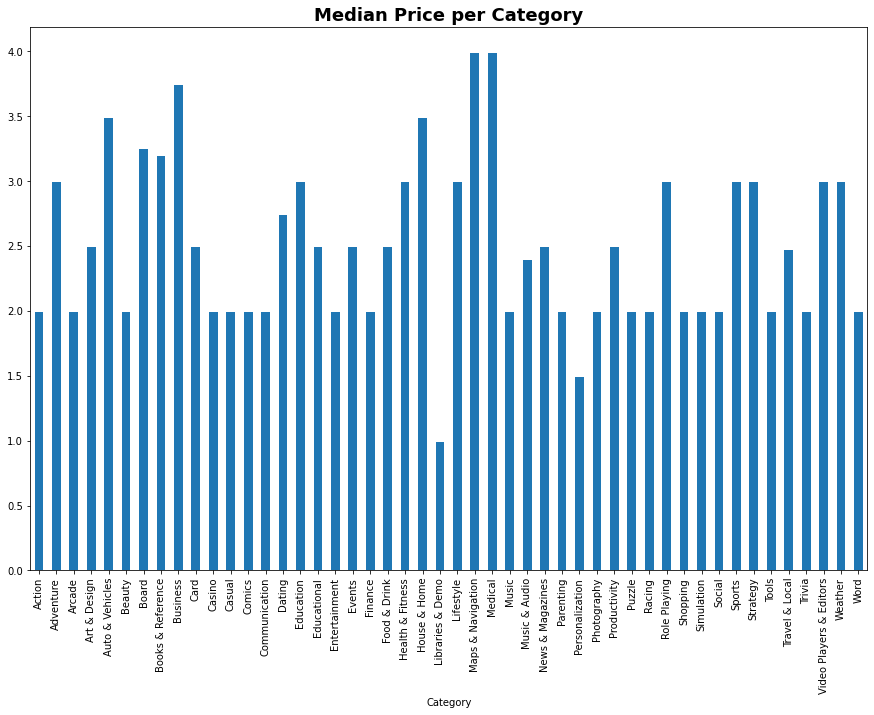

In [30]:
plt.figure(figsize=(15, 10))
price_statistic_frame["Median Price"].plot(kind="bar")
plt.title("Median Price per Category", fontdict={"size": 18, "weight": "bold"})
plt.show()

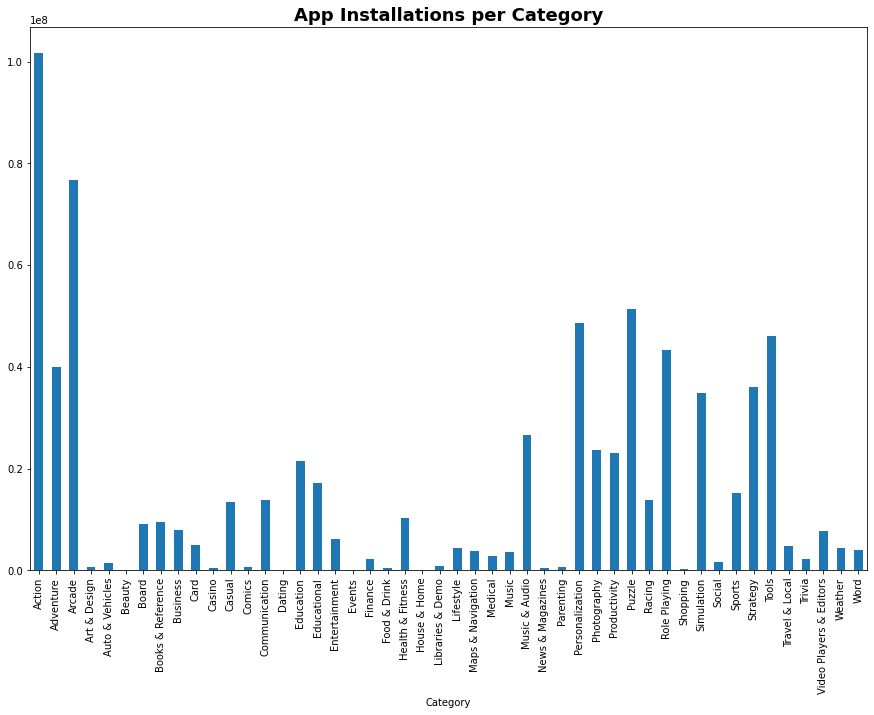

In [31]:
plt.figure(figsize=(15, 10))
price_statistic_frame["Num Installs"].plot(kind="bar")
plt.title("App Installations per Category", fontdict={"size": 18, "weight": "bold"})
plt.show()

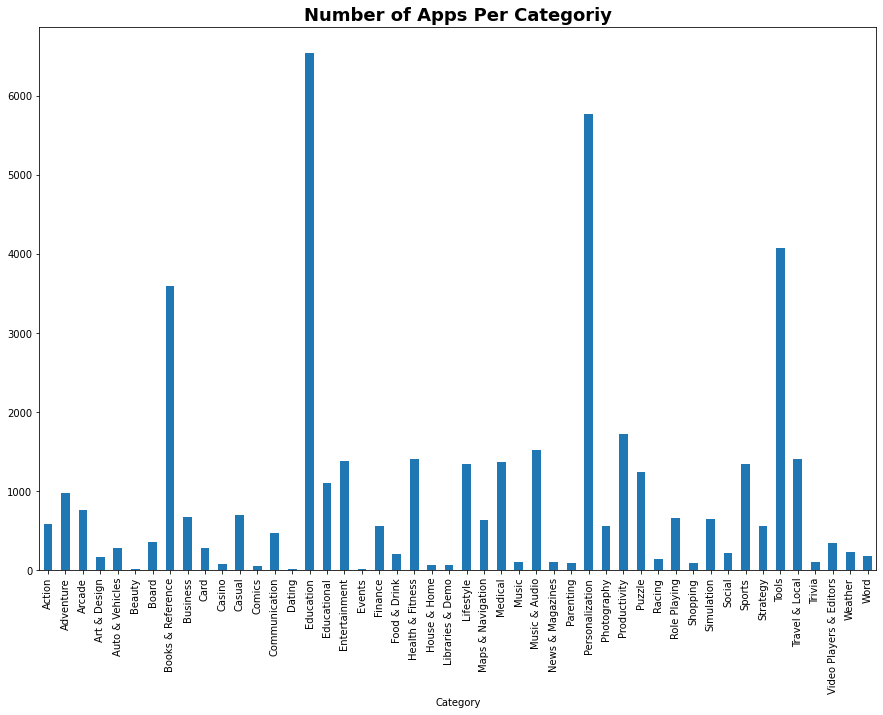

In [32]:
plt.figure(figsize=(15, 10))
price_statistic_frame["Num Apps"].plot(kind="bar")
plt.title("Number of Apps Per Categoriy", fontdict={"size": 18, "weight": "bold"})
plt.show()